In [63]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

In [64]:
G = nx.Graph()

G.add_edges_from([(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4)])

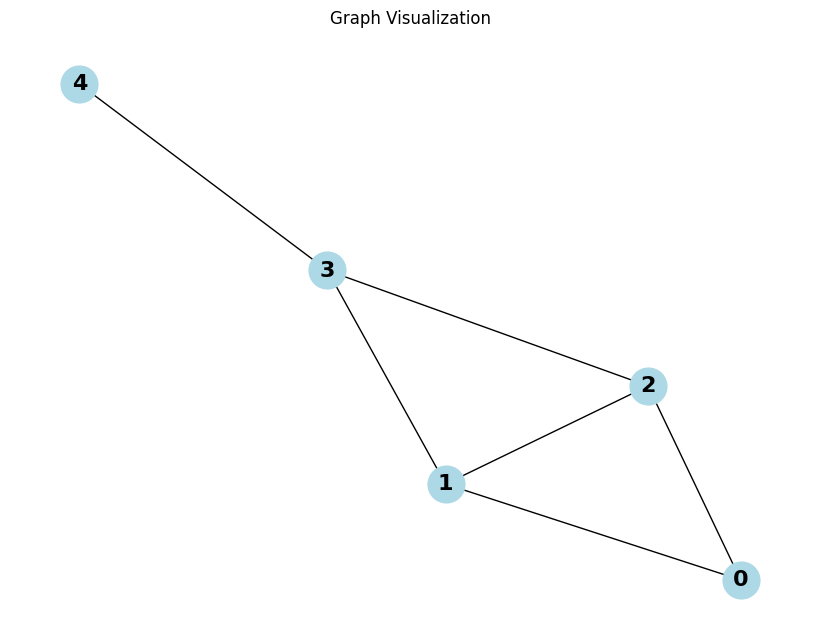

In [65]:
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=16, font_color='black', font_weight='bold')
plt.title("Graph Visualization")
plt.show()

In [66]:
# Get the adjacency matrix
adjacency_matrix = nx.to_numpy_array(G)

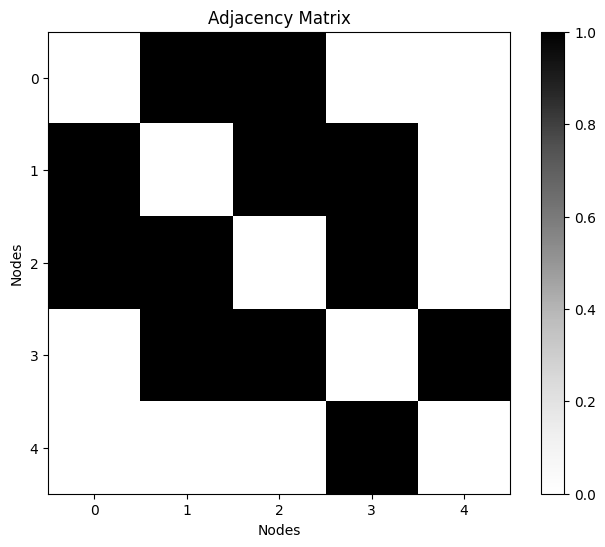

In [67]:
# Display the adjacency matrix
plt.figure(figsize=(8, 6))
plt.imshow(adjacency_matrix, cmap='Greys', interpolation='nearest')
plt.title("Adjacency Matrix")
plt.colorbar()
plt.xticks(ticks=np.arange(len(G.nodes())), labels=G.nodes())
plt.yticks(ticks=np.arange(len(G.nodes())), labels=G.nodes())
plt.xlabel("Nodes")
plt.ylabel("Nodes")
plt.show()

In [68]:
print("Adjacency Matrix:")
print(adjacency_matrix)

Adjacency Matrix:
[[0. 1. 1. 0. 0.]
 [1. 0. 1. 1. 0.]
 [1. 1. 0. 1. 0.]
 [0. 1. 1. 0. 1.]
 [0. 0. 0. 1. 0.]]


create a milti-varience gaussian distributiuon

In [69]:
# Define the starting and ending points
points = np.array([[1, 2], [5, 3], [3, 6]])  # Example points

In [70]:
# Create grid for the plot
x = np.linspace(0, 7, 100)
y = np.linspace(0, 8, 100)
X, Y = np.meshgrid(x, y)

In [71]:
# Initialize the Z array for Gaussian values
Z = np.zeros_like(X)

In [72]:
# Define a function to compute Gaussian values
def gaussian_distribution(point, X, Y, variance=1.0):
    rv = multivariate_normal(mean=point, cov=variance * np.eye(2))
    return rv.pdf(np.dstack((X, Y)))

In [73]:
# Compute the Gaussian distribution values for each point
for point in points:
    Z += gaussian_distribution(point, X, Y)

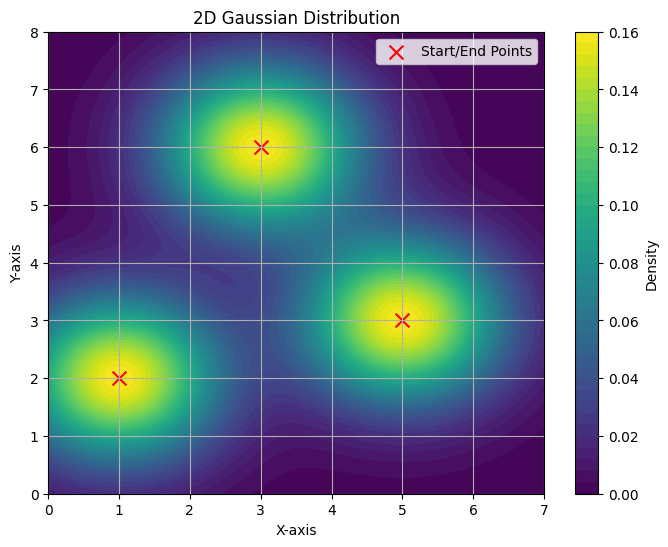

In [74]:
# Plotting the Gaussian distribution
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='Density')
plt.scatter(points[:, 0], points[:, 1], color='red', marker='x', s=100, label='Start/End Points')
plt.title('2D Gaussian Distribution')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid()
plt.show()

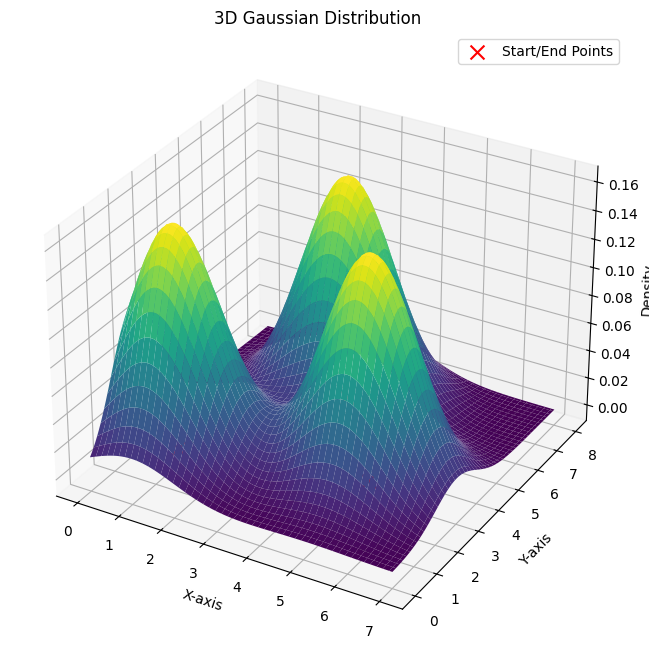

In [75]:
# Plotting the 3D Gaussian distribution
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Scatter the original points
ax.scatter(points[:, 0], points[:, 1], np.zeros(len(points)), color='red', marker='x', s=100, label='Start/End Points')

# Labels and title
ax.set_title('3D Gaussian Distribution')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Density')
ax.legend()

plt.show()

In [76]:
# Define the dimensions of the map
width = 10
height = 8

# Create a grid of shape (width, height)
grid_x, grid_y = np.meshgrid(np.arange(width), np.arange(height))

# Define a sample path (as a series of waypoints)
# For example, a zigzag path
path = np.array([[1, 2], [2, 4], [3, 3], [4, 6], [5, 5], [6, 7], [7, 2]])

# Initialize a probability map with zeros
probability_map = np.zeros((height, width))

# Assign probabilities along the path
for waypoint in path:
    wx, wy = waypoint
    for x in range(width):
        for y in range(height):
            # Use a simple exponential decay formula to calculate distance-based probability
            distance = np.sqrt((x - wx) ** 2 + (y - wy) ** 2)
            probability_map[y, x] += np.exp(-distance)  # Note: using probability_map[y, x] for correct indexing

# Normalize the probability map
probability_map = probability_map / np.max(probability_map)

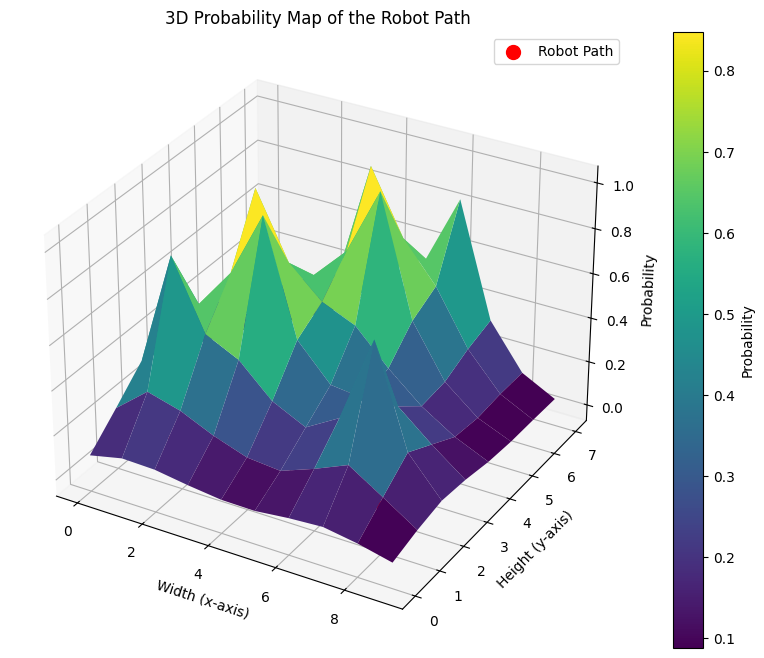

In [77]:

# Plotting the 3D surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(grid_x, grid_y, probability_map, cmap='viridis', edgecolor='none')

# Set labels and title
ax.set_xlabel('Width (x-axis)')
ax.set_ylabel('Height (y-axis)')
ax.set_zlabel('Probability')
ax.set_title('3D Probability Map of the Robot Path')

# Add a color bar for reference
fig.colorbar(surf, ax=ax, label='Probability')

# Scatter the path points for reference
ax.scatter(path[:, 0], path[:, 1], np.zeros(len(path)), color='red', marker='o', s=100, label='Robot Path')

# Show legend
ax.legend()

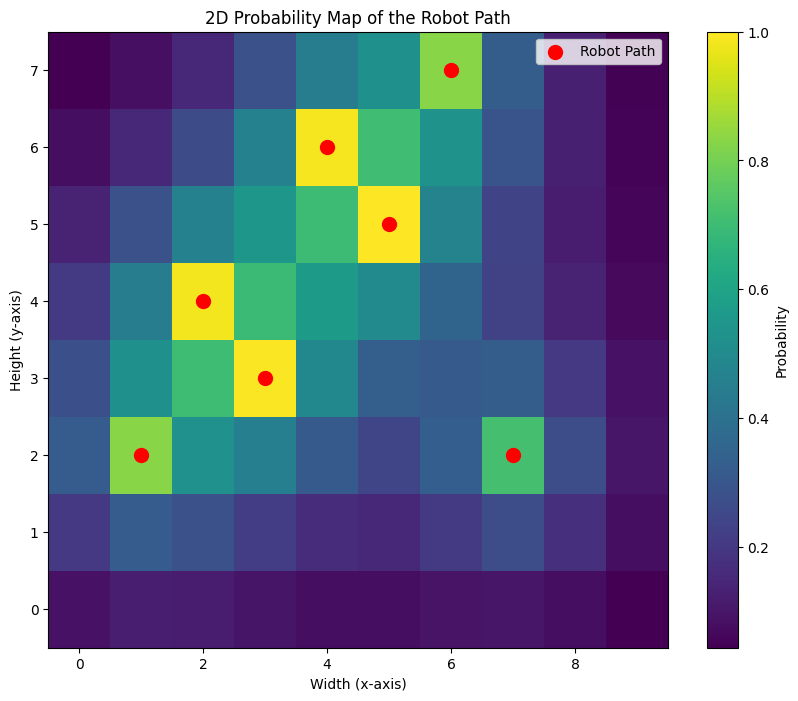

In [78]:
# Plotting the probability map as a 2D matrix
plt.figure(figsize=(10, 8))
plt.imshow(probability_map, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(label='Probability')
plt.title('2D Probability Map of the Robot Path')
plt.xlabel('Width (x-axis)')
plt.ylabel('Height (y-axis)')

# Scatter the path points for reference
plt.scatter(path[:, 0], path[:, 1], color='red', marker='o', s=100, label='Robot Path')
plt.legend()

plt.show()

In [79]:
def adj_matrix_to_list(adj_matrix):
    adj_list = {}
    for i in range(len(adj_matrix)):
        # Create a list of neighbors for each vertex
        adj_list[i] = [j for j in range(len(adj_matrix)) if adj_matrix[i][j] == 1]
    return adj_list

In [80]:
def adj_list_to_matrix(adj_list):
    size = len(adj_list)
    adj_matrix = np.zeros((size, size), dtype=int)
    for i, neighbors in adj_list.items():
        for neighbor in neighbors:
            adj_matrix[i][neighbor] = 1  # Set the connection
    return adj_matrix

In [81]:
# Example adjacency matrix
adj_matrix = np.array([
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 0, 1, 0]
])

# Convert adjacency matrix to adjacency list
adj_list = adj_matrix_to_list(adj_matrix)
print("Adjacency List:")
print(adj_list)

# Convert back to adjacency matrix
converted_matrix = adj_list_to_matrix(adj_list)
print("\nConverted Adjacency Matrix:")
print(converted_matrix)

Adjacency List:
{0: [1, 3], 1: [0, 2], 2: [1, 3], 3: [0, 2]}

Converted Adjacency Matrix:
[[0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]]
